In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearni.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [8]:
# Task 1: Create a NumPy array from the 'Class' column in 'data'
Y = data['Class'].to_numpy()


In [9]:
# Task 2: Standardize data in X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split

# Task 3: Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definición de parámetros para búsqueda en GridSearchCV
parameters = {
    "C": [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Crear el modelo de regresión logística
lr = LogisticRegression()

# Crear el objeto GridSearchCV con validación cruzada cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajustar el modelo con los datos de entrenamiento
logreg_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros y la mejor precisión
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


Accuracy on test data: 0.8333333333333334


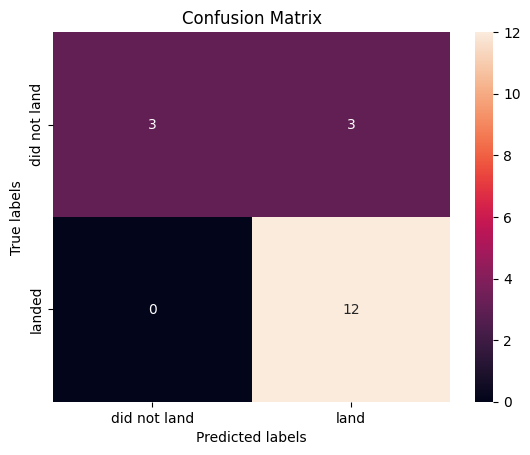

In [12]:
accuracy_test = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy_test)

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [13]:
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Test Accuracy: 0.8333333333333334


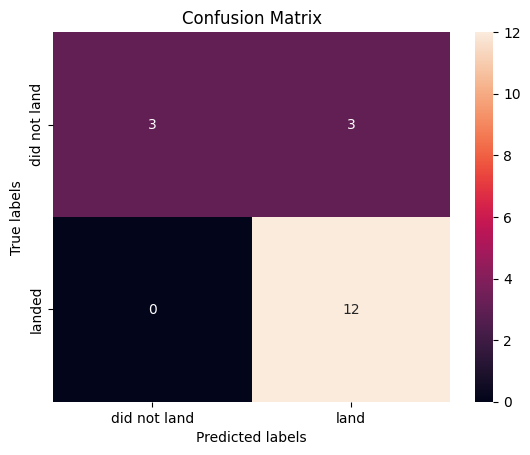

In [14]:
accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [15]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)



/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8892857142857145


Test accuracy: 0.8333333333333334


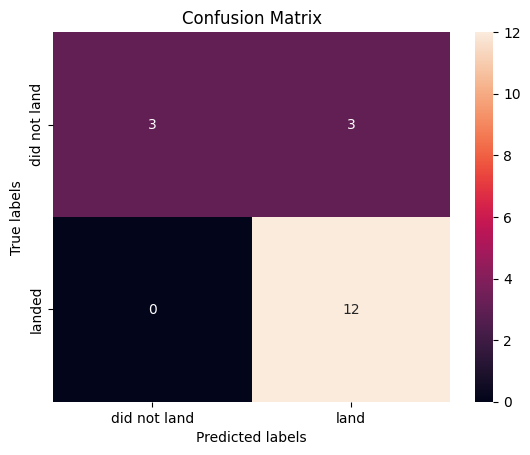

In [16]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test accuracy:", accuracy_tree)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [17]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)


<class 'ValueError'>: Invalid parameter 'criterion' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

In [18]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy_knn)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


<class 'sklearn.exceptions.NotFittedError'>: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
accuracies = {
    'Logistic Regression': logreg_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"Best performing model: {best_model} with accuracy {best_accuracy}")


<class 'sklearn.exceptions.NotFittedError'>: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [20]:
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [21]:
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

Accuracy on test data: 0.8333333333333334


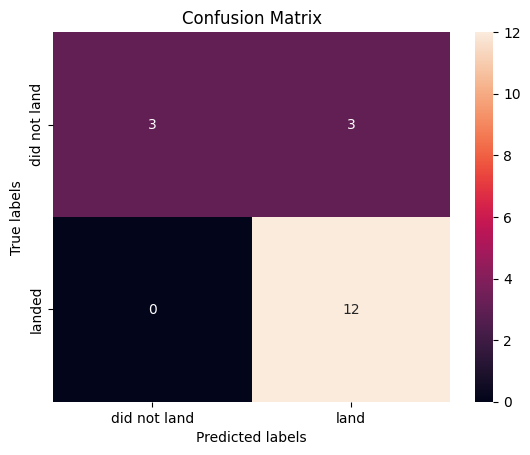

In [22]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy_knn)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [23]:
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [24]:
accuracies = {
    'Logistic Regression': logreg_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print("Best performing model:", best_model)
print("Best accuracy:", best_accuracy)


Best performing model: Logistic Regression
Best accuracy: 0.8333333333333334


Mejor modelo: Logistic Regression
Precisión: 0.8333333333333334


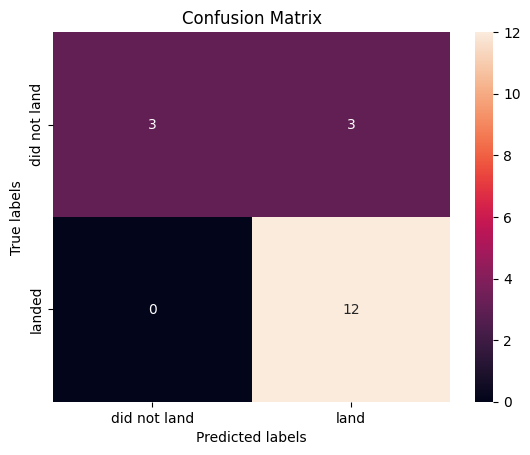

In [25]:
# Precisión de cada modelo en el conjunto de prueba
accuracies = {
    'Logistic Regression': logreg_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print("Mejor modelo:", best_model)
print("Precisión:", best_accuracy)

# Matriz de confusión para el mejor modelo
if best_model == 'Logistic Regression':
    yhat = logreg_cv.predict(X_test)
elif best_model == 'SVM':
    yhat = svm_cv.predict(X_test)
elif best_model == 'Decision Tree':
    yhat = tree_cv.predict(X_test)
else:
    yhat = knn_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)


In [26]:
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [27]:
data.describe()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


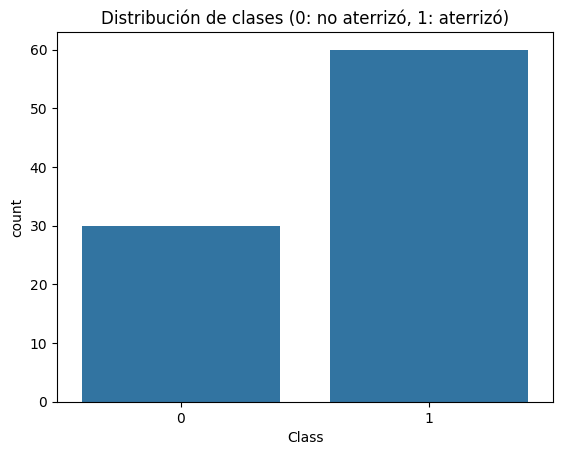

In [28]:
sns.countplot(x='Class', data=data)
plt.title("Distribución de clases (0: no aterrizó, 1: aterrizó)")
plt.show()


In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones entre variables")
plt.show()


<Figure size 1200x800 with 0 Axes>

<class 'ValueError'>: could not convert string to float: '2010-06-04'

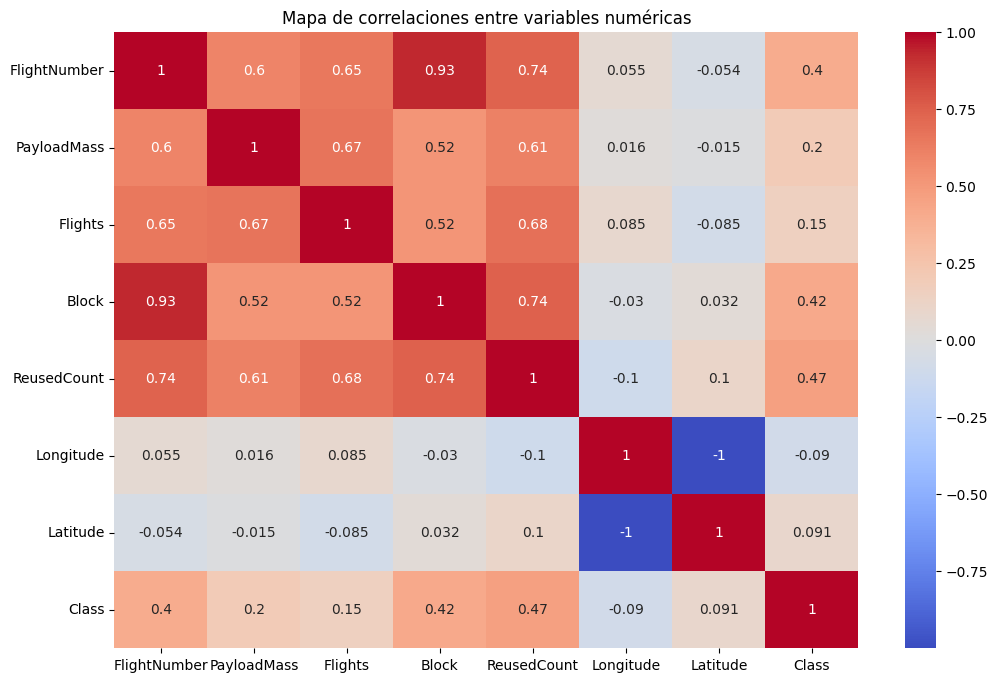

In [30]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()


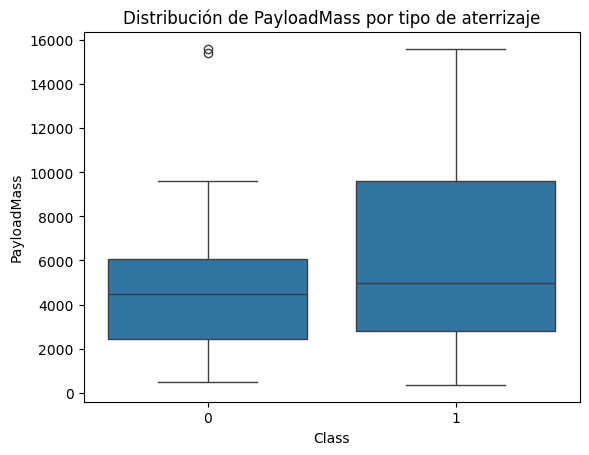

In [31]:
sns.boxplot(x='Class', y='PayloadMass', data=data)
plt.title("Distribución de PayloadMass por tipo de aterrizaje")
plt.show()
